In [1]:
# very slow
import pandas as pd
path = 'UserBehavior.csv'
df = pd.read_csv(path, encoding='utf-8', sep=',', header=None)
print(df[:10])

   0        1        2   3           4
0  1  2268318  2520377  pv  1511544070
1  1  2333346  2520771  pv  1511561733
2  1  2576651   149192  pv  1511572885
3  1  3830808  4181361  pv  1511593493
4  1  4365585  2520377  pv  1511596146
5  1  4606018  2735466  pv  1511616481
6  1   230380   411153  pv  1511644942
7  1  3827899  2920476  pv  1511713473
8  1  3745169  2891509  pv  1511725471
9  1  1531036  2920476  pv  1511733732


In [9]:
import numpy as np
def getActionType(act):
    if act == 'pv':
        return 0
    if act == 'buy':
        return 1
    if act == 'cart':
        return 2
    if act == 'fav':
        return 3
    
    
def getUserActionArr(data):
    userID = data[0][0]
    userActions =  np.zeros((988255,4))
    userCnt = 0
    for i in range(len(data)):
        if data[i][0] != userID:
            userID = data[i][0]
            userCnt += 1
        if data[i][0] == userID:
            actionType = getActionType(data[i][3])
            userActions[userCnt][actionType] += 1
            
    return userActions, userCnt

In [3]:
# very slow, data size = 100150807
data = df.values

In [11]:
# # very slow
userActions, userCnt = getUserActionArr(data)
print(userCnt)# 988255
print(userActions[:3])

0
100000000
988255
[[55.  0.  0.  0.]
 [84.  8.  0.  6.]
 [67.  0.  2. 12.]]


In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = userActions[:988255]
y_pred = KMeans(n_clusters=5, random_state=9).fit_predict(X)

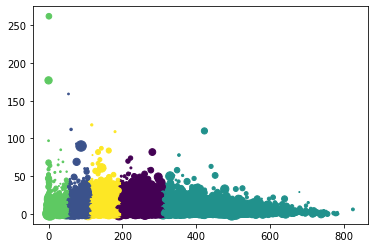

In [ ]:
plt.scatter(X[:, 0], X[:, 1], X[:, 2],  c=y_pred)
plt.show()

In [56]:
X_0 = X[np.where(y_pred==0)]
X_1 = X[np.where(y_pred==1)]
X_2 = X[np.where(y_pred==2)]
X_3 = X[np.where(y_pred==3)]
X_4 = X[np.where(y_pred==4)]
XArr = [X_0, X_1, X_2, X_3, X_4]


mean_0 = np.mean(X_0, axis=0)
mean_1 = np.mean(X_1, axis=0)
mean_2 = np.mean(X_2, axis=0)
mean_3 = np.mean(X_3, axis=0)
mean_4 = np.mean(X_4, axis=0)
meanArr = [mean_0, mean_1, mean_2, mean_3, mean_4]

for i in range(5):
    print('[Cluster %d] size: %d, mean: %s' % (i+1, len(XArr[i]), str(meanArr[i])))

[Cluster 1] size: 81363, mean: [237.60285388   3.27007362  11.67042759   7.33080147]
[Cluster 2] size: 292888, mean: [80.887486    2.10707165  5.62894349  2.66786963]
[Cluster 3] size: 24527, mean: [382.24556611   3.62107066  14.51836751   9.61731969]
[Cluster 4] size: 421269, mean: [30.02420781  1.39773399  2.68409259  1.14751857]
[Cluster 5] size: 168208, mean: [146.66102088   2.70500214   8.59315253   4.70318891]
